In [1]:
import numpy as np
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt
import cv2
import os
import random
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import preprocessing

In [3]:
def create_dataset(PATH, img_size=50):
    CATEGORIES = ["cats", "dogs"]
    data = []
    for category in CATEGORIES:
        path = os.path.join(PATH, category)
        label = CATEGORIES.index(category)
        for file in os.listdir(path):
            im = cv2.imread(os.path.join(path, file), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(im, (img_size,img_size), interpolation=cv2.INTER_AREA)
            data.append([img,label])
        
    random.shuffle(data)
    X = []
    Y = []

    for image,label in data:
        X.append(image)
        Y.append(label)
    X = np.array(X)
    Y = np.array(Y)
    return X,Y,data

In [3]:
def unroll_image(X,y):
    x = X.reshape(X.shape[0],-1).T
    y = y.reshape(y.shape[0],-1).T
    return x,y

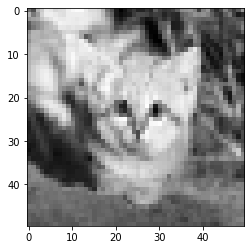

In [13]:
X,y,data = create_dataset('/home/nukul/Documents/PARTH/datas/train',50)
X_train,Y_train=unroll_image(X,y)
sd = np.std(X_train)
nX = preprocessing.normalize(X_train)
X_train=nX

a,b = data[1]
plt.imshow(a,cmap="gray")
plt.show()

In [310]:
def sigmoid(x):
    sig = 1/(1+np.exp(-x))
    return sig

In [311]:
def init_weights(x,y):
    nx = x.shape[0]
    n1 = 100
    n2 = y.shape[0]
    w1 = np.random.rand(n1,nx) * 0.01
    b1 = 0                #np.random.randn(n1,1)
    w2 = np.random.rand(n2,n1)*0.01
    b2= 0                 #np.random.randn(n2,1)
    
    weights = {"w1":w1,
               "b1":b1,
               "w2":w2,
               "b2":b2}
    return weights

In [312]:
def loss_fun(A2,y):
    m = y.shape[1]
    logprobs = np.multiply(np.log(A2),y) + np.multiply(np.log(1-A2),(1-y))
    cost = (-1/m)*np.sum(logprobs)
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    return cost

In [313]:
def forward_propogate(x,y,weights):
    w1 = weights["w1"]
    b1 = weights["b1"]
    w2 = weights["w2"]
    b2 = weights["b2"]
    
    m = y.shape[1]
    #     Forward Propogation
    
    Z1 = np.matmul(w1,x) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(w2,A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {"Z1":Z1,
             "A1":A1,
             "Z2":Z2,
             "A2":A2}
    
    return cache
        

In [314]:
def back_propogate(weights,cache,x,y):
    w1 = weights["w1"]
    w2 = weights["w2"]
    
    Z1 = cache["Z1"]
    A1 = cache["A1"]
    Z2 = cache["Z2"]
    A2 = cache["A2"]
    
    m = y.shape[1]
    cost = loss_fun(A2,y)
    dZ2 = A2 - y
    dw2 = np.matmul(dZ2, A1.T)/m
    db2 = np.sum(dZ2, axis=1,keepdims = True)/m
    dZ1 = np.matmul(w2.T,dZ2) * (A1*(1-A1))
    dw1 = np.matmul(dZ1,x.T)/m
    db1 = np.sum(dZ1, axis=1,keepdims = True)/m
    
    grads = {"dw1":dw1,
             "db1":db1,
             "dw2":dw2,
             "db2":db2}
    
    return grads,cost 


In [315]:
def optimize(x,y,weights,iters=100,learning_rate=0.5):
    
    loss = []
    idx = []
    for i in range(iters):
        cache = forward_propogate(x,y,weights)
        grads,cost = back_propogate(weights,cache,x,y)
        
        w1 = weights["w1"]
        b1 = weights["b1"]
        w2 = weights["w2"]
        b2 = weights["b2"]
        
        dw1 = grads["dw1"]
        db1 = grads["db1"]
        dw2 = grads["dw2"]
        db2 = grads["db2"]
        
        
        if (i % 100 == 0):
            loss.append(cost)
            idx.append(i)
            
            
        w1 = w1 - (learning_rate*dw1)
        w2 = w2 - (learning_rate*dw2)
        b1 = b1 - (learning_rate*db1)
        b2 = b2 - (learning_rate*db2)
        
        weights = {"w1":w1,
                   "b1":b1,
                   "w2":w2,
                   "b2":b2}
    
    return weights,loss,idx
    

In [373]:
def predict(weights,x,y):
    w1 = weights["w1"]
    b1 = weights["b1"]
    w2 = weights["w2"]
    b2 = weights["b2"]
    
    cache = forward_propogate(x,y,weights)
    a2 = cache["A2"]
    predictions = (a2>0.5)
    return predictions,a2

In [317]:
def Accuracy(y,prediction):
    t = (prediction==y)
    accuracy = np.mean(t)*100
    return accuracy

In [387]:
def confidence(a):
    perc = (1-a)*100
    return perc

In [405]:
weight = init_weights(X_train, Y_train)
weights,loss,index = optimize(X_train, Y_train, weight, 2000, 1.5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


In [406]:
X,y,data = create_dataset('/home/nukul/Documents/PARTH/datas/test',50)
X_test,Y_test=unroll_image(X,y)
sd = np.std(X_test)
nX = preprocessing.normalize(X_test)
X_test=nX

print(X_test.shape)
print(weights["w1"].shape)
a=np.array(X_test[:,1]).reshape(2500,-1)
b=np.array(Y_test[:,1]).reshape(1,-1)
C = forward_propogate(X_test,Y_test,weights)
# a2 = C["A2"]
# z2 = C["Z2"]
# at = predict(weights,X_test,Y_test)

print(at)
print(Y_test)
print(z2)

# a=X[:,1].reshape(1225,-1)
# a.shape
# b=Y[:,1].reshape(1,-1)
# C = forward_propogate(X,Y,weights)
# a2 = C["A2"]
# z2 =C["Z2"]
# at = predict(weights,X,Y)
# print(predict(weights,X,Y).shape)
# print(Y.shape)

(2500, 10)
(100, 2500)
[[False  True False  True  True False  True  True  True  True]]
[[0 0 0 1 1 1 1 0 1 0]]
[[-1.5630972   9.43319629 -0.88227935  8.0581991   4.06230509 -4.24937452
   0.34339333  8.53369852  7.74729961  1.01675347]]


In [411]:
Accuracy(Y_test,at)
b
weights["w1"].shape

(100, 2500)

In [410]:
_,v=predict(weights, a ,b)
print('the image is %d'%confidence(v) + '%' + " cat")
a = a.reshape(50,-1)
plt.imshow(a,cmap="gray")
plt.show()

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 50 is different from 2500)